# Project- Part A: Airbnb Price Prediction and Insights

# Video Link:
https://drive.google.com/file/d/1aRHpoBYJY38byhW_ml11Omwwrc8BODD7/view?usp=sharing

In [2]:
# Importing Required Libraries and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Loading the dataset
df=pd.read_csv('Airbnb_data.csv')

# Reading first 5 rows from dataframe
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# Task 1: Data Exploration and Preprocessing 

#### Analyze the dataset for trends, missing values and outliers.

In [6]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
# Displaying number of rows and columns present in the dataframe
df.shape

(74111, 29)

In [8]:
# Displaying statistical information of the dataframe 
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [9]:
# Checking if there are any null values or missing values present in the dataframe
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [10]:
# Filling the null values with the mode of the column
df['first_review'] = df['first_review'].fillna(df['first_review'].mode()[0])
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mode()[0])
df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])
df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood'].mode()[0])
df['thumbnail_url'] = df['thumbnail_url'].fillna(df['thumbnail_url'].mode()[0])
df['zipcode'] = df['zipcode'].fillna(df['zipcode'].mode()[0])

In [11]:
# Filling the null values with the mean of the column
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

In [12]:
# Dropping rows with missing values
df = df.dropna()  

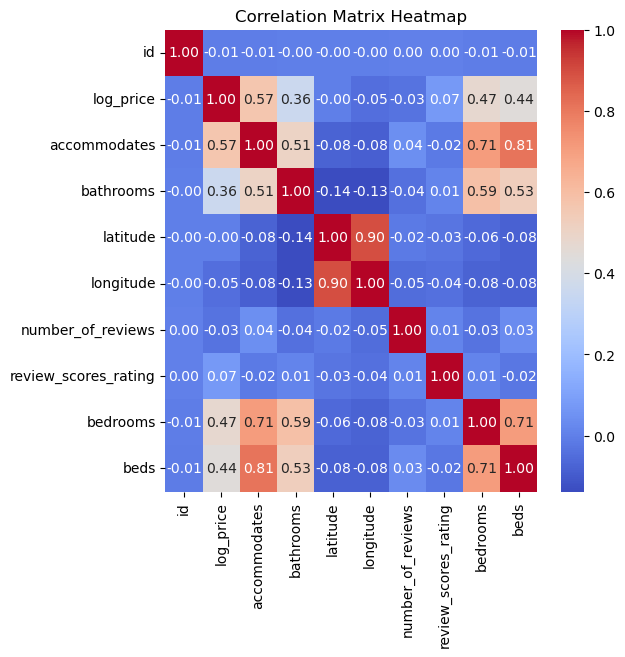

In [13]:
# Understanding the important numerical features in the dataset

# Calculating the correlation matrix for only numerical columns
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Creating the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Adding title to the plot
plt.title('Correlation Matrix Heatmap')

# Showing the plot
plt.show()

# Observations: 
The numerical features that can be considered for better analysis are accommodates, lattitude, longitude, bedrooms and beds.

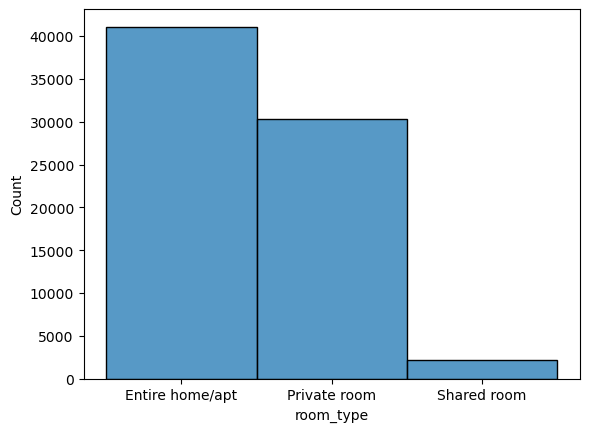

In [15]:
# Creating histogram plot for room type
sns.histplot(df['room_type'], bins=5, kde=False)  

# Display the plot
plt.show()

# Observation:
Entire Home or Apartment the most frequent room type considered by guests. Private rooms is the next preferred room type by guests, while least prefered is shared room type. 

In [17]:
# Displaying top 15 property names
top_10_values = df['property_type'].value_counts()
top_10_values[:5]

property_type
Apartment      48610
House          16424
Condominium     2650
Townhouse       1683
Loft            1236
Name: count, dtype: int64

# Observation:
Apartment, House, Condominium, Townhouse and Loft are the top 5 Property types that are preferred while booking the rooms in Airbnb.

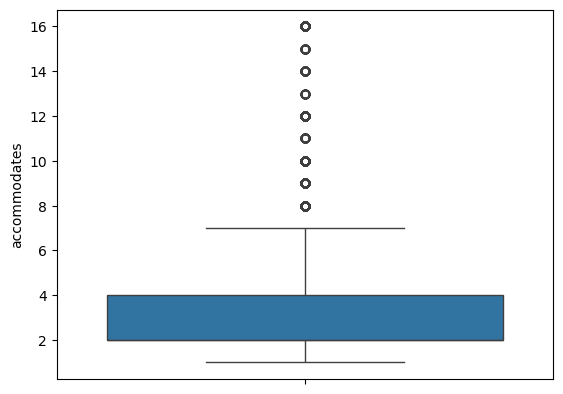

In [19]:
# Identifying the outliers using box plot
sns.boxplot(data=df['accommodates'])
plt.show()

# Observation:
Accommodation feature has many outliers in the dataset.

#### Perform data cleaning, feature engineering and transformations.

In [22]:
from scipy.stats import zscore

# Calculating the Z-score for the 'accommodates' column
df['z_score'] = zscore(df['accommodates'])

# Identifying the outliers
outliers = df[df['z_score'].abs() > 3]

# Displaying number of rows with outliers
print("Outliers detected are", outliers.shape[0], "records")


Outliers detected are 1536 records


In [23]:
# Retaining rows having Z-score less than the threshold, inturn removing outliers
df_cleaned = df[df['z_score'].abs() <= 3]

# Dropping the 'z_score' column from the dataframe
df_cleaned = df_cleaned.drop(columns=['z_score'])


In [24]:
df_cleaned.shape

(72043, 29)

In [25]:
#checking for the duplicates
df_cleaned.duplicated().sum()

0

In [26]:
final_df=df_cleaned.copy()

#### Feature Engineering: Extract meaningful features, such as neighbourhood popularity, number of amenities and host activity metrics.

In [28]:
# For every neighbourhood, calculating 'number_of_reviews' to get the popularity for each listing using transform function
final_df['neighbourhood_popularity'] = final_df.groupby('neighbourhood')['number_of_reviews'].transform('sum')
final_df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,neighbourhood_popularity
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.000000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1422
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.000000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,34153
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,-73.943756,The Garden Oasis,Harlem,10,92.000000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,27930
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,94.067365,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,3573
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.000000,https://a0.muscache.com/im/pictures/70087089/b...,20009,0.0,1.0,5758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,-73.939405,one room bushwick,Williamsburg,0,94.067365,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0,153639
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.000000,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,1511
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.000000,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,153639
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,94.067365,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,9241


In [29]:
# Creating a function to count amenities in each rows
def num_of_amenities(value):
    # Splitting by double quotes to create a list
    temp_list = value.split('"')
    count=0
    # Counting each amenities
    for i in temp_list:
        # Excluding the '{', '}', ',' in temp_list
        if i not in ['{', '}', ',']:
            count=(len(i))
    return count

# Applying the num_of_amenities function to the 'amenities' column and creating a new column in the dataframe
final_df['amenities_count'] = final_df['amenities'].apply(num_of_amenities)
final_df


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,neighbourhood_popularity,amenities_count
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.000000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,1422,42
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.000000,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,34153,42
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,The Garden Oasis,Harlem,10,92.000000,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,27930,42
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Beautiful Flat in the Heart of SF!,Lower Haight,0,94.067365,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,3573,12
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Great studio in midtown DC,Columbia Heights,4,40.000000,https://a0.muscache.com/im/pictures/70087089/b...,20009,0.0,1.0,5758,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,one room bushwick,Williamsburg,0,94.067365,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0,153639,2
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.000000,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0,1511,42
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.000000,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0,153639,12
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,Designer's Apartment in HEART of NYC,West Village,0,94.067365,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0,9241,25


In [30]:
# Converting the host_response_rate column by removing the '%' and converting it to integer
final_df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(int)

In [32]:
# Converting date columns from object data type to datetime format
final_df['first_review'] = pd.to_datetime(final_df['first_review'], format='%d-%m-%Y')
final_df['last_review'] = pd.to_datetime(final_df['last_review'], format='%d-%m-%Y')
final_df['host_since'] = pd.to_datetime(final_df['host_since'], format='%d-%m-%Y')

# Calculating the number of days between first review and last review columns, the less number of days 
# indicates that the listing is being booked frequently
final_df['number_of_days_between_reviews'] = (final_df['last_review'] - final_df['first_review']).dt.days

In [33]:
# Calculating the number of days between last review and host_since columns, the more number of days 
# indicates that the host is an experienced host
final_df['number_of_days_host_is_launched'] = (final_df['last_review'] - final_df['host_since']).dt.days

In [35]:
#Encoding Categorical Varaibles
label_encoders={}

# Here excluding the 9 categorical features like id, amenities(as we have created number of amenities feature), 
# description, first_review and last_review(as a new column called number_of_days_between_reviews is added),host_since(as a new column called
# number_of_days_host_is_launched is added), name, thumbnail_url.
# So considering 20 columns from the dataset for building the model.

categorical_list=['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city','host_has_profile_pic','host_identity_verified',
                  'instant_bookable','neighbourhood','zipcode']

for i in categorical_list:
    le=LabelEncoder()
    final_df[i]=le.fit_transform(final_df[i])
    label_encoders[i]=le
final_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,neighbourhood_popularity,amenities_count,number_of_days_between_reviews,number_of_days_host_is_launched
0,6901257,5.010635,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,2,1,...,2,100.000000,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,103,1.0,1.0,1422,42,30,1575
1,6304928,5.129899,0,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,4,2,1,...,6,93.000000,https://a0.muscache.com/im/pictures/348a55fe-4...,19,3.0,3.0,34153,42,49,96
2,7919400,4.976734,0,0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,1,...,10,92.000000,https://a0.muscache.com/im/pictures/6fae5362-9...,26,1.0,3.0,27930,42,137,324
3,13418779,6.620073,17,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,0,1,...,0,94.067365,https://a0.muscache.com/im/pictures/72208dad-9...,645,2.0,2.0,3573,12,119,742
4,3808709,4.744932,0,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,1,...,4,40.000000,https://a0.muscache.com/im/pictures/70087089/b...,208,0.0,1.0,5758,20,621,693


In [36]:
# Data Splitting: Dividing the data into training and testing sets

In [37]:
# Creating Input and Output variables
X = final_df.drop(columns=['id', 'log_price','amenities','description','first_review','host_since','last_review','name','thumbnail_url'],axis=1)
y = final_df['log_price']

# Splitting into train and test sets into 60:40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Printing the sizes of train, test and validation sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 43225
Test set size: 28818


In [38]:
X_train.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,neighbourhood_popularity,amenities_count,number_of_days_between_reviews,number_of_days_host_is_launched
5608,17,1,2,1.0,4,2,1,2,1,1,...,284,15,100.000000,213,1.0,1.0,170,25,1198,1237
1452,0,0,2,1.0,4,0,0,4,1,1,...,23,0,94.067365,101,1.0,1.0,17144,12,119,1557
2992,0,2,1,1.0,4,0,1,4,1,1,...,251,1,100.000000,35,1.0,1.0,34153,42,0,1237
1947,17,1,2,1.0,4,2,1,0,1,1,...,355,0,94.067365,241,1.0,1.0,941,9,119,1408
3585,0,1,2,2.0,4,2,0,1,1,1,...,268,33,97.000000,288,1.0,1.0,2474,42,292,1285


In [39]:
X_test.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,neighbourhood_popularity,amenities_count,number_of_days_between_reviews,number_of_days_host_is_launched
31973,11,1,2,2.0,4,1,1,3,1,1,...,596,7,100.000000,356,2.0,1.0,3329,16,89,657
10584,22,0,2,1.0,4,1,1,3,1,1,...,149,4,95.000000,345,0.0,1.0,11119,42,105,919
42425,0,0,8,3.0,4,2,1,3,1,1,...,347,49,86.000000,351,4.0,4.0,30257,25,856,1482
34407,17,1,2,1.0,4,0,0,3,1,0,...,601,0,94.067365,505,1.0,1.0,153639,33,119,1096
49853,17,1,4,1.0,4,1,1,3,1,0,...,601,1,100.000000,593,1.0,2.0,153639,42,0,211


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 5608 to 16256
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    43225 non-null  int32  
 1   room_type                        43225 non-null  int32  
 2   accommodates                     43225 non-null  int64  
 3   bathrooms                        43225 non-null  float64
 4   bed_type                         43225 non-null  int32  
 5   cancellation_policy              43225 non-null  int32  
 6   cleaning_fee                     43225 non-null  int64  
 7   city                             43225 non-null  int32  
 8   host_has_profile_pic             43225 non-null  int32  
 9   host_identity_verified           43225 non-null  int32  
 10  host_response_rate               43225 non-null  int32  
 11  instant_bookable                 43225 non-null  int32  
 12  latitude            

In [41]:
# Performing Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Task 2: Model Development 

#### Build a regression model to predict listing prices.

# 1.Linear Regression

In [45]:
# Building Multiple Linear Regression Algorithm
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
# Prediction from the model
lr_y_pred=lr.predict(X_test)

# Evaluating the model
lr_mse=mean_squared_error(y_test,lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2=r2_score(y_test,lr_y_pred)

# Displaying the results
print(f'Mean Squared Error: {lr_mse}')
print(f"Root Mean Square Error (RMSE): {lr_rmse}")
print(f'R^2 Score: {lr_r2}')

Mean Squared Error: 0.23193661221716072
Root Mean Square Error (RMSE): 0.48159797779596286
R^2 Score: 0.5166943504378457


# Observation:
R2 Score is less and is not considered during model evaluation.

# 2. KNN

In [48]:
# Building KNN Algorithm
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [50]:
# Prediction from the model
knn_y_pred=knn.predict(X_test)

# Evaluating the model
knn_mse=mean_squared_error(y_test,knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2=r2_score(y_test,knn_y_pred)

# Displaying the results
print(f'Mean Squared Error: {knn_mse}')
print(f"Root Mean Square Error (RMSE): {knn_rmse}")
print(f'R^2 Score: {knn_r2}')

Mean Squared Error: 0.2366623367611292
Root Mean Square Error (RMSE): 0.4864795337536094
R^2 Score: 0.5068469643415272


# Observation:
R2 Score is less like in Linear Regression Algorithm but performing hyperparameter tuning to get better results.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [52]:
knn_param_grid = {'n_neighbors': [3,5,9,13,15],
                  'weights':['uniform','distance'],
                  'algorithm': ['auto', 'kd_tree']}
knn_grid_search = GridSearchCV (estimator=KNeighborsRegressor(), param_grid=knn_param_grid, cv=5, scoring='r2',n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5, 9, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [53]:
knn_best_params=knn_grid_search.best_params_
knn_best_r2_score=knn_grid_search.best_score_
print(knn_best_params)
print(knn_best_r2_score)

{'algorithm': 'kd_tree', 'n_neighbors': 15, 'weights': 'distance'}
0.5460564141175519


# Observation:
R2 Score is better than Linear Regression Algorithm but not considered during model evaluation as Random Forest is giving better score. See below for reference.

# 3. DecisionTreeRegressor

In [55]:
# Building Decision Tree Algorithm
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [56]:
# Prediction from the model
dt_y_pred=dt.predict(X_test)

# Evaluating the model
dt_mse=mean_squared_error(y_test,dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2=r2_score(y_test,dt_y_pred)

# Displaying the results
print(f'Mean Squared Error: {dt_mse}')
print(f"Root Mean Square Error (RMSE): {dt_rmse}")
print(f'R^2 Score: {dt_r2}')

Mean Squared Error: 0.31418377518273016
Root Mean Square Error (RMSE): 0.5605209854971802
R^2 Score: 0.345309082102113


# Observation:
R2 Score is very less compared to other algorithms and is not considered during model evaluation.

# 4. Random Forest

In [58]:
# Building Random Forest Algorithm
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
# Prediction from the model
rf_y_pred=rf.predict(X_test)

# Evaluating the model
rf_mse=mean_squared_error(y_test,rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2=r2_score(y_test,rf_y_pred)

# Displaying the results
print(f'Mean Squared Error: {rf_mse}')
print(f"Root Mean Square Error (RMSE): {rf_rmse}")
print(f'R^2 Score: {rf_r2}')

Mean Squared Error: 0.15733781600116198
Root Mean Square Error (RMSE): 0.39665831139806207
R^2 Score: 0.6721420795267354


# Observation:
R2 Score is between 0.5 to 0.8 can is a moderate fit to this dataset, so performing hyper parameter tuning to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [61]:
rf_param_grid = { 'n_estimators' : [25,50,100],
                  'max_depth': [3,8,12],
                  'min_samples_split':[6,8,10]} 
rf_grid_search = GridSearchCV (estimator=RandomForestRegressor(), param_grid=rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 12],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [25, 50, 100]},
             scoring='r2')

In [62]:
rf_best_params=rf_grid_search.best_params_
rf_best_r2_score=rf_grid_search.best_score_
print(rf_best_params)
print(rf_best_r2_score)

{'max_depth': 12, 'min_samples_split': 10, 'n_estimators': 100}
0.6584835025087183


# Observation:
R2 Score is less compared to the default values for Random Forest Algorithm. So considering default values during model evaluation.

# 5. SVM

In [64]:
# Building SVM Algorithm
svm=SVR()
svm.fit(X_train,y_train)

SVR()

In [65]:
# Prediction from the model
svm_y_pred=svm.predict(X_test)

# Evaluating the model
svm_mse=mean_squared_error(y_test,svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r2=r2_score(y_test,svm_y_pred)

# Displaying the results
print(f'Mean Squared Error: {svm_mse}')
print(f"Root Mean Square Error (RMSE): {svm_rmse}")
print(f'R^2 Score: {svm_r2}')

Mean Squared Error: 0.18406427127402272
Root Mean Square Error (RMSE): 0.4290271218396603
R^2 Score: 0.6164499371665215


# Observation:
R2 Score is between 0.5 to 0.8 can is a moderate fit to this dataset, so performing hyper parameter tuning to get better result.

#### Model Tuning: Experiment with different models and tune hyperparameters to optimize performance.

In [67]:
svm_param_grid = { 'C' : [0.1,0.5,1,5],
                   'kernel': ['linear','rbf','poly'],
                    'gamma': ['scale', 'auto']}  
svm_grid_search = GridSearchCV (estimator=SVR(), param_grid=svm_param_grid, cv=3, scoring='r2',n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='r2')

In [68]:
svm_best_params=svm_grid_search.best_params_
svm_best_r2_score=svm_grid_search.best_score_
print(svm_best_params)
print(svm_best_r2_score)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.6092072149440585


# Observation:
R2 Score is good compared to other algorithms but less compared to Random Forest Algorithm. So not considering this algorithm during model evaluation.

# Task 3: Model Evaluation 

#### Evaluate the model’s performance using appropriate metrics like RMSE, MAE and R².

# Random Forest

In [130]:
# Building Random Forest Algorithm
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [132]:
# Getting the most important columns from the dataset using feature importances function
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Selecting top 20 features from the dataset
top_n=20
top_20_features = indices[:top_n]

# Printing the indices and importance scores of the top 20 features
print(f"Top {top_n} Features and their Importance Scores:")
for i in range(top_n):
    print(f"Feature {top_20_features[i]} - Importance: {importances[top_20_features[i]]:.3f}")

Top 20 Features and their Importance Scores:
Feature 1 - Importance: 0.372
Feature 13 - Importance: 0.097
Feature 3 - Importance: 0.095
Feature 17 - Importance: 0.071
Feature 12 - Importance: 0.068
Feature 23 - Importance: 0.043
Feature 15 - Importance: 0.033
Feature 2 - Importance: 0.029
Feature 18 - Importance: 0.028
Feature 20 - Importance: 0.024
Feature 21 - Importance: 0.022
Feature 14 - Importance: 0.020
Feature 22 - Importance: 0.018
Feature 16 - Importance: 0.017
Feature 0 - Importance: 0.012
Feature 10 - Importance: 0.009
Feature 5 - Importance: 0.009
Feature 19 - Importance: 0.007
Feature 7 - Importance: 0.006
Feature 6 - Importance: 0.006


In [133]:
# Selecting only top 20 features from the train and test sets
X_train_top = X_train[:, top_20_features]
X_test_top = X_test[:, top_20_features]

In [134]:
# Training with only top 20 features from the original train set
rf_top = RandomForestRegressor()
rf_top.fit(X_train_top, y_train)

RandomForestRegressor()

In [135]:
# Prediction from the model with only top 20 features from the original test set
rf_top_y_pred=rf_top.predict(X_test_top)

# Evaluating the model
rf_top_mse=mean_squared_error(y_test,rf_top_y_pred)
rf_top_rmse = np.sqrt(rf_top_mse)
rf_top_r2=r2_score(y_test,rf_top_y_pred)

# Displaying the results
print(f'Mean Squared Error: {rf_top_mse}')
print(f"Root Mean Square Error (RMSE): {rf_top_rmse}")
print(f'R^2 Score: {rf_top_r2}')

Mean Squared Error: 0.1580648288366457
Root Mean Square Error (RMSE): 0.3975736772431566
R^2 Score: 0.670627142288778


# Observation:
1. After taking top 20 features from the original dataset, the model is not improved much.
2. So we can conclude that Random Forest Algorithm with default values is performing well with R2 Score of 0.6721.
3. This means model is able to predict 67.21 % variance in the dataset and is a moderate fit to the given dataset.
4. Also Mean Squared Error and Root Mean Square Error has lower value, indicating that model is performing well on unseen data.

#### Visualizations: Use charts and graphs to present data trends and model results clearly.

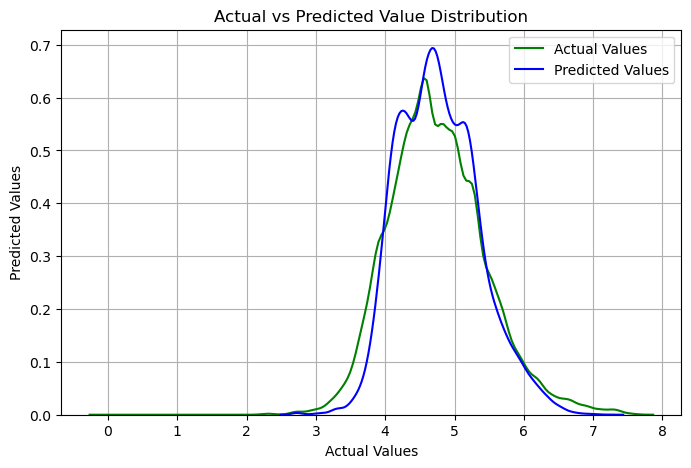

In [189]:
# Plotting Distribution Plot (Actual vs Predicted Distribution)
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual Values', color='green')
sns.kdeplot(rf_top_y_pred, label='Predicted Values', color='blue')
plt.title('Actual vs Predicted Value Distribution')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Observation:
There is very less gap between the probability distribution of actual values and the predicted values. This indicates that model is performing well on the test data.

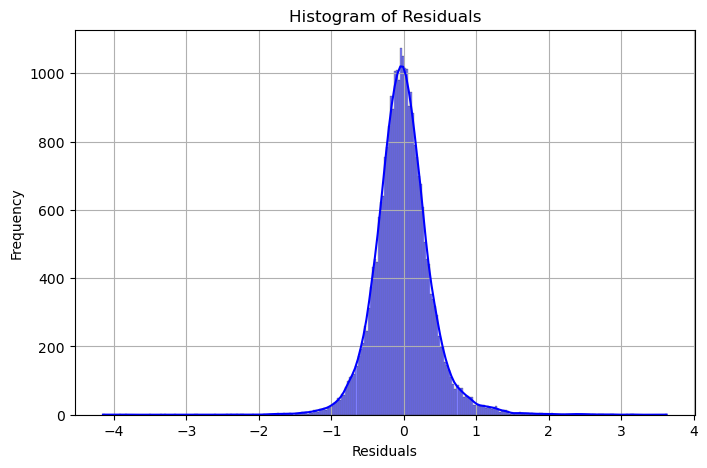

In [191]:
# Histogram of Residuals
residuals = y_test - rf_top_y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Observation:
We can see that residuals is following normal ditribution for Random Forest Algorithm. So, we can conclude that model is performing well on test data.

# Final Insights:
1. Airbnb dataset is a large dataset with 74k records and the booking price is in Log-transformed price for each of the listing or rooms of the respective hosts.
2. Have trained the dataset with Linear Regression, KNN, Decision Tree, Random Forest and SVM algorithms.
3. Among these algorithms, Random Forest Algorithm works better as it has the R2 score value of 0.6721.
4. This indicates that the model is able to predict the new or unseen data by explaining 67.21% variance in the data.
5. The probability distribution(pdf) of both Actual and Predicted values are not far away from each other. Which means the errors are comparitively less and the model can be used on new data to predict the booking price for Airbnb.
6. The residuals are normally distributed which implies that the model is performing better on test set. So Airbnb can rely on this model as the errors are low compared to other algorithms.